### Download the Dataset

In [1]:
import json

with open('/Users/niloufar/Desktop/DeepLearning/tf_specialization/dataset/sarcasm.json', 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])


### Split the Dataset

In [2]:
training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

### Data preprocessing

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


vocab_size = 25000
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# len(word_index)

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)


In [15]:
training_labels

array([0, 0, 1, ..., 0, 0, 1])

### Build and Compile the Model

In [17]:
import tensorflow as tf

embedding_dim = 64
lstm_dim = 32
dense_dim = 24

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 64)           1600000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 24)                1560      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,626,417
Trainable params: 1,626,417
Non-trainable params: 0
_________________________________________________________________


### Train the Model

In [18]:
NUM_EPOCHS = 10

history = model_lstm.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels))

Epoch 1/10


2023-05-27 11:05:31.781708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-27 11:05:31.954718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-27 11:05:31.967307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-27 11:05:32.246441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-27 11:05:32.261632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - ETA: 0s - loss: 0.3923 - accuracy: 0.8077

2023-05-27 11:06:13.936143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-27 11:06:14.014093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-05-27 11:06:14.021566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 50s 76ms/step - loss: 0.3923 - accuracy: 0.8077 - val_loss: 0.3195 - val_accuracy: 0.8633
Epoch 2/10
625/625 [==============================] - 46s 74ms/step - loss: 0.1524 - accuracy: 0.9405 - val_loss: 0.3669 - val_accuracy: 0.8588
Epoch 3/10
625/625 [==============================] - 46s 74ms/step - loss: 0.0590 - accuracy: 0.9807 - val_loss: 0.5244 - val_accuracy: 0.8477
Epoch 4/10
625/625 [==============================] - 47s 74ms/step - loss: 0.0229 - accuracy: 0.9931 - val_loss: 0.6102 - val_accuracy: 0.8477
Epoch 5/10
625/625 [==============================] - 47s 75ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.8460 - val_accuracy: 0.8393
Epoch 6/10
625/625 [==============================] - 47s 75ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.9229 - val_accuracy: 0.8386
Epoch 7/10
625/625 [==============================] - 47s 75ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.9872 - val_accuracy: 0.8387
Epo

In [19]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val'+string])
    plt.show()

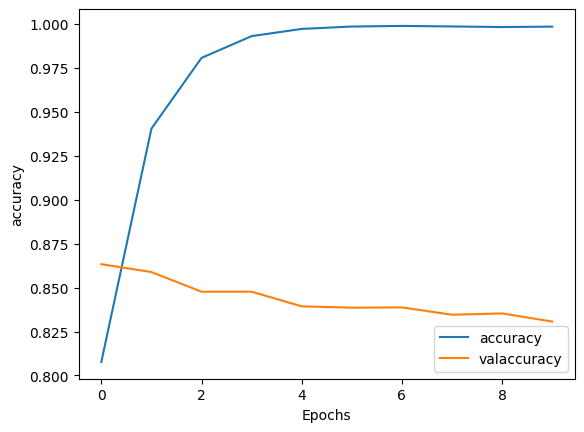

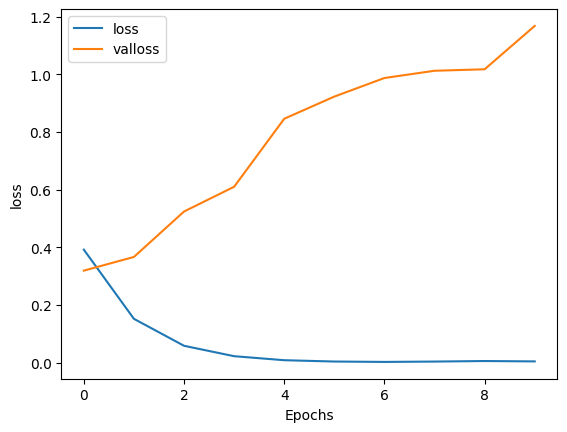

In [20]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')